# Bolsa de valores

Prevendo o volume de ações utilizando o modelo Random Forest Regressor com inclusão de indicadores financeiros como CMO, DX e MFI

* Utilizaremos dados do Yahoo Finance da PETR4 num intervalo de tempo específico

* Dados serão obtido através da biblioteca Pandas DataReader

Importando bibliotecas

In [39]:
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np

Definindo janela de tempo

In [40]:
start = dt.datetime(2018,1,1)
end = dt.datetime(2020,9,30)

Obtendo dados da PETR4

In [41]:
PETR4 = web.DataReader('PETR4.SA',"yahoo",start,end)

Exibindo as cinco primeiras linhas

In [42]:
PETR4.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,16.549999,16.190001,16.190001,16.549999,33461800.0,15.353477
2018-01-03,16.719999,16.370001,16.490000,16.700001,55940900.0,15.492632
2018-01-04,16.959999,16.620001,16.780001,16.730000,37064900.0,15.520465
2018-01-05,16.860001,16.570000,16.700001,16.830000,26958200.0,15.613236
2018-01-08,17.030001,16.709999,16.740000,17.030001,28400000.0,15.798776


Adicionando indicadores

In [43]:
High = PETR4['High'].values
Low = PETR4['Low'].values
Open = PETR4['Open'].values
Close = PETR4['Close'].values
Volume = PETR4['Volume'].values

In [44]:
from talib._ta_lib import ADX, APO, CCI, CMO, DX, RSI, DX, MACD, MFI, ROC, RSI, ULTOSC

Indicador ADX

In [45]:
PETR4['ADX'] = ADX(High, Low, Close, timeperiod=14)

Indicador APO

In [46]:
PETR4['APO'] = APO(Close, fastperiod=12, slowperiod=26, matype=0)

Indicador CCI

In [47]:
PETR4['CCI'] = CCI(High, Low, Close, timeperiod=14)

Indicador CMO

In [48]:
PETR4['CMO'] = CMO(Close, timeperiod=14)

Indicador DX

In [49]:
PETR4['DX'] = DX(High, Low, Close, timeperiod=14)

Indicador MACD

In [50]:
macd, macdsignal, macdhist = MACD(Close, fastperiod=12, slowperiod=26, signalperiod=9)

In [51]:
PETR4['MACD'] = macd

Indicador MFI

In [52]:
PETR4['MFI'] = MFI(High, Low, Close, Volume, timeperiod=14)

Indicador ROC

In [53]:
PETR4['ROC'] = ROC(Close, timeperiod=14)

Indicador RSI

In [54]:
PETR4['RSI'] = RSI(Close, timeperiod=14)

Indicador ULTOSC

In [55]:
PETR4['ULTOSC'] = ULTOSC(High, Low, Close, timeperiod1=7, timeperiod2=14, timeperiod3=28)

Verificando amostra

In [56]:
PETR4.head()

,High,Low,Open,Close,Volume,Adj Close,ADX,APO,CCI,CMO,DX,MACD,MFI,ROC,RSI,ULTOSC
Date,,,,,,,,,,,,,,,,
2018-01-02,16.549999,16.190001,16.190001,16.549999,33461800.0,15.353477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,16.719999,16.370001,16.490000,16.700001,55940900.0,15.492632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,16.959999,16.620001,16.780001,16.730000,37064900.0,15.520465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,16.860001,16.570000,16.700001,16.830000,26958200.0,15.613236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,17.030001,16.709999,16.740000,17.030001,28400000.0,15.798776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Removendo NaNs

In [57]:
PETR4 = PETR4.dropna()

In [58]:
PETR4.head()

,High,Low,Open,Close,Volume,Adj Close,ADX,APO,CCI,CMO,DX,MACD,MFI,ROC,RSI,ULTOSC
Date,,,,,,,,,,,,,,,,
2018-02-21,20.879999,20.250000,20.590000,20.250000,55678400.0,18.785978,50.183427,0.547308,133.369296,25.947041,36.058930,0.764380,62.902391,2.015111,62.973520,49.747331
2018-02-22,20.820000,20.540001,20.590000,20.740000,38170900.0,19.240553,49.174534,0.433333,138.440140,32.487034,36.058930,0.790453,68.858693,6.413545,66.243517,55.799849
2018-02-23,21.139999,20.620001,20.950001,21.120001,55755600.0,19.593082,48.602845,0.384167,138.896529,37.124592,41.170888,0.832186,69.588028,7.208122,68.562296,62.209241
2018-02-26,21.690001,21.379999,21.400000,21.520000,48160500.0,19.964159,48.613662,0.441987,169.207081,41.666901,48.754283,0.887309,69.551632,4.873294,70.833450,60.302844
2018-02-27,21.850000,21.340000,21.469999,21.500000,42912500.0,19.945608,48.765791,0.447051,134.961225,41.117938,50.743471,0.918788,76.284543,7.661496,70.558969,59.156273


* Removendo High, Low, Open, Close, Adj Close

In [59]:
PETR4 = PETR4.drop(['High','Low','Open','Close', 'Adj Close'],axis=1)

* Normalizando dados do Volume

In [60]:
from sklearn.preprocessing import RobustScaler

In [61]:
scaler = RobustScaler()

In [62]:
PETR4['Volume'] = scaler.fit_transform(PETR4['Volume'].values.reshape(-1, 1))

Definindo variáveis X e Y

In [63]:
X = PETR4.drop(['Volume'],axis=1)
Y = PETR4['Volume']

* Criando amostra de treino e teste

In [76]:
X_treino = X[X.index<'2020-08-01']
X_teste = X[X.index>='2020-08-01']

Y_treino = Y[X.index<'2020-08-01']
Y_teste = Y[X.index>='2020-08-01']

* Prevendo volume utilizando modelo Random Forest Regressor

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
rfr = RandomForestRegressor()

In [ ]:
rfr.fit(X_treino,Y_treino)

In [ ]:
Y_previsto = rfr.predict(X_teste)

* Desnormalizando dados

In [69]:
Y_previsto = scaler.inverse_transform(Y_previsto.reshape(-1, 1))

In [70]:
Y_teste = scaler.inverse_transform(Y_teste.values.reshape(-1, 1))

* Graficando Y_previsto em função de Y_teste

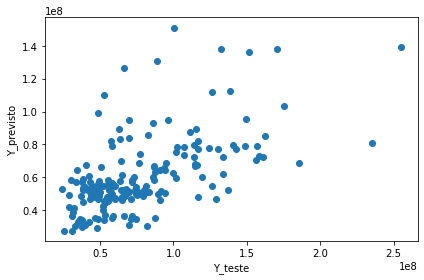

In [71]:
plt.scatter(Y_teste,Y_previsto)
plt.xlabel('Y_teste')
plt.ylabel('Y_previsto')
plt.tight_layout()

Calculando métricas de erro

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [73]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [74]:
MAE = mean_absolute_error(Y_teste,Y_previsto)
MAPE = mean_absolute_percentage_error(Y_teste,Y_previsto)
MSE = mean_squared_error(Y_teste,Y_previsto)
RMSE = np.sqrt(MSE)

In [75]:
print("MAE = {:0.2e}".format(MAE))
print("MAPE = {:0.2f}%".format(MAPE))
print("MSE = {:0.2e}".format(MSE))
print("RMSE = {:0.2e}".format(RMSE))

MAE = 2.56e+07
MAPE = 30.71%
MSE = 1.26e+15
RMSE = 3.56e+07


Podemos prever o valor com uma incerteza de 24.26%. Um pouco melhor do que o caso sem indicadores que foi de 28.78%. 